                                       Predicting survial on the great Titanic
                                       
The RMS Titanic set sail on its maiden voyage on April 10th 1912, crossing the Atlantic from Southampton, England to New York City. The ship never completed the voyage, sinking to the bottom of the Atlantic Ocean after hitting an iceberg, bringing down 1,502 of 2,224 passengers onboard.

In this project I will create some plots to view passenger data of the titanic to see how certain factors affected survival. I will also create a Logistic Regression model that predicts which passengers survived based on features including age, sex and passenger class. 
Lastly, I ask some interesting questions at the end of the project to see if some additional criteria may also help predict who survived the sinking of the Titanic. 

The data I used for the training our model is provided by Kaggle. For full disclosure, much of this project was inspired from the Titanic exercise that I completed on Codecademy (with hints from a Codecademy instructor). 
I also viewed other Titanic projects from others that posted notebooks on Kaggle as a learning tool. I used bits and pieces from several of these notebooks as well as online searches to put this project together, and I tweaked and reworked it to make it my own. 

In [38]:
import seaborn
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from termcolor import colored

First, let's load the train file and test file so that we can view the data.
The first question is what features can I use to predict survival?

In [39]:
train = pd.read_csv('train.csv', delimiter =',')
print(train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [40]:
train[['Last_Name','First_Name']] = train.Name.str.split(",",expand=True,)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last_Name,First_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev. Juozas
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss. Margaret Edith
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,Mr. Karl Howell


In [41]:
test= pd.read_csv("test.csv")
#print(train.head())
#print(test.head())

In [42]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


I will start by focusing on the sex of the passengers by mapping the the text values in the sex column ot a numerical value.
I'll also add a column called Passenger Sex that is not mapped to a value, this column will be used for easier viewing of a plot legend.
Here I will plot a chart showing survival by passenger sex. 

In [43]:
train['Passenger Sex']=train['Sex']

In [44]:
train['Sex']=train['Sex'].map({'male':0, 'female': 1})
print(train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886        

       (percentages are rounded to the nearest whole number)    
   
               19.0 % of male passengers survived.
               74.0 % of female passengers survived.
  


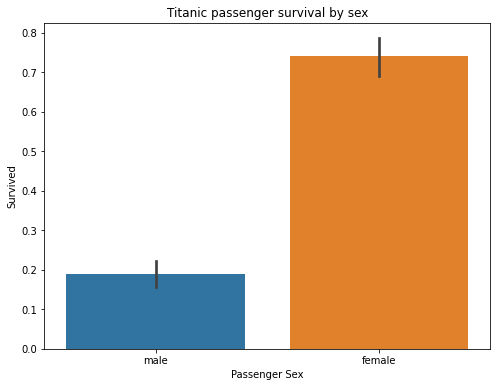

In [45]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="Passenger Sex", y="Survived", data=train)
plt.title("Titanic passenger survival by sex")

print(colored('       (percentages are rounded to the nearest whole number)    ', 'blue', attrs=['bold']))
#print("        (percentages are rounded to the nearest whole number)    ")
print("   ")

male_passengers= train["Survived"][train["Sex"]== 0].value_counts(normalize =True)[1]*100
print("              ",male_passengers.round(decimals=0),"% of male passengers survived.")


female_passengers = train["Survived"][train["Sex"]== 1].value_counts(normalize =True)[1]*100
print("              ",female_passengers.round(decimals=0),"% of female passengers survived.")
print("  ")
##################

In [46]:
train['Passenger Class']=train['Pclass'].map({1:'first', 2:'second', 3:'third'})

In [47]:
class_sex_grouping = train.groupby(['Passenger Class','Passenger Sex']).mean()
class_sex_grouping

PassengerId  Survived  Pclass  Sex        Age  \
Passenger Class Passenger Sex                                                  
first           female          469.212766  0.968085     1.0  1.0  34.611765   
                male            455.729508  0.368852     1.0  0.0  41.281386   
second          female          443.105263  0.921053     2.0  1.0  28.722973   
                male            447.962963  0.157407     2.0  0.0  30.740707   
third           female          399.729167  0.500000     3.0  1.0  21.750000   
                male            455.515850  0.135447     3.0  0.0  26.507589   

                                  SibSp     Parch        Fare  
Passenger Class Passenger Sex                                  
first           female         0.553191  0.457447  106.125798  
                male           0.311475  0.278689   67.226127  
second          female         0.486842  0.605263   21.970121  
                male           0.342593  0.222222   19.741782  
third           female         0.895833  0.798611   16.118810  
                male           0.498559  0.224784   12.661633

How did passenger class affect survival? Let's take a look at the chart below.

         (percentages are rounded to the nearest whole number)    
  
                63.0 % of first class passengers survived.
                47.0 % of second class passengers survived.
                24.0 % of third class passengers survived.
  


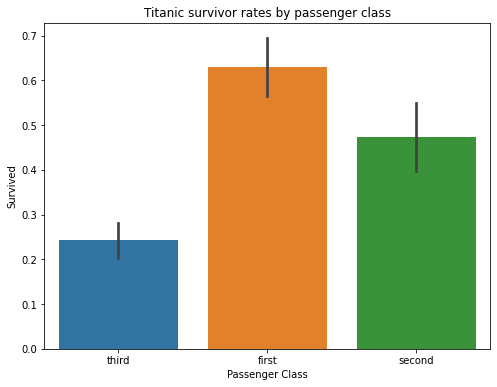

In [48]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x="Passenger Class", y="Survived", data=train)
plt.title("Titanic survivor rates by passenger class")


print(colored('         (percentages are rounded to the nearest whole number)    ', 'blue', attrs=['bold']))
print("  ")


first_class= train["Survived"][train["Pclass"]== 1].value_counts(normalize =True)[1]*100
print("               ",first_class.round(decimals=0),"% of first class passengers survived.")

second_class=train["Survived"][train["Pclass"]== 2].value_counts(normalize =True)[1]*100
print("               ",second_class.round(decimals=0),"% of second class passengers survived.")

third_class=train["Survived"][train["Pclass"]== 3].value_counts(normalize =True)[1]*100
print("               ",third_class.round(decimals=0),"% of third class passengers survived.")

print("  ")

Here is a chart showing survival broken down by passenger class for males vs females:

Text(0.5, 1.0, 'Titanic survivors by passenger class & sex')

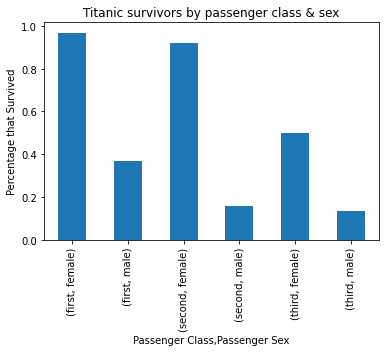

In [49]:
class_sex_grouping['Survived'].plot.bar()
plt.ylabel('Percentage that Survived')
plt.title('Titanic survivors by passenger class & sex')

Is there any correlation to the age of passengers and survival? 
The very youngest group of survivors had the highest survival rate, the oldest group had the lowest survior rate, however it is difficult to see any noticeble patterns for the rest of age groups.

In [50]:
train['Age'].fillna(inplace=True, value=round(train['Age'].mean()))
print(train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886        

Text(0.5, 1.0, 'Titanic survivors by age group (in 10 year increments)')

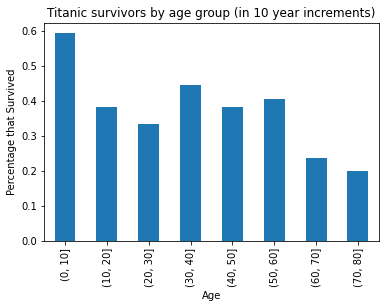

In [51]:
group_by_age = pd.cut(train["Age"], np.arange(0, 90, 10))
age_grouping = train.groupby(group_by_age).mean()
age_grouping['Survived'].plot.bar()
plt.ylabel('Percentage that Survived')
plt.title('Titanic survivors by age group (in 10 year increments)')

Here is another graph that shows it is very difficult to deciper any real correlation strictly between age of passengers and survival.

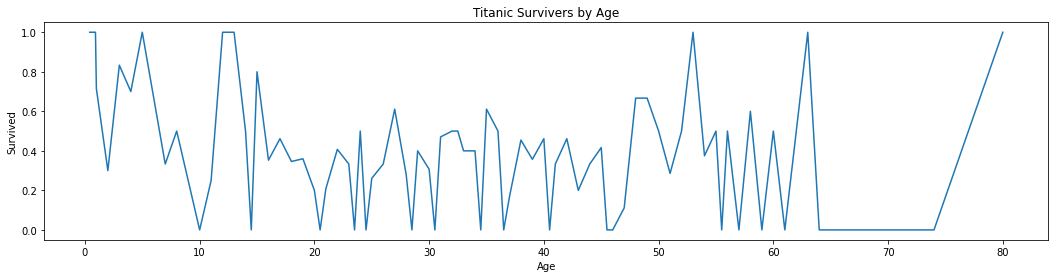

In [52]:
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
x='Age'
y='Survived'
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Titanic Survivers by Age')
plt.plot(x,y, data=average_age)

It's time to start building a model to make predictions on survival.
#I will look at Sex, passenger class and age as the features to predict survival.
#First, I'll start with mapping each passenger class to a numerical value.

In [53]:
train['FirstClass']=train['Pclass'].apply(lambda p: 1 if p ==1 else 0)
print(train) ##now only FirstClass passengers have a 1 in their column.

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [54]:
train['SecondClass']=train['Pclass'].apply(lambda p: 1 if p ==2 else 0)


In [55]:
train['ThirdClass']=train['Pclass'].apply(lambda p: 1 if p ==3 else 0)
print(train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [56]:
features=train[['Sex', 'Age', 'FirstClass', 'SecondClass', 'ThirdClass']]
survived=train['Survived']

The data is split into a training data set and a test data set.
I'll use the training set to train the model and the test set to evaluate the model.
I am going to use a logistic regression model to make my predictions on Titanic survival.
I will first need to scale the feature data by creating a standard scaler object.

In [57]:
train_features, test_features, train_labels, test_labels = train_test_split(features, survived)

In [58]:
scaler=StandardScaler()
train_features = scaler.fit_transform(train_features)

test_features = scaler.transform(test_features)

Next I will fit the model that will perform gradiet descent to find the feature coefficients that minimize the log-loss for the training data.
This will train the model to recognize which type of passengers survived and which type of passengers didn't survive based on the features (Sex, Age, FirstClass, SecondClass and ThirdClass).

In [59]:
model = LogisticRegression()
model.fit(train_features, train_labels)

LogisticRegression()

Scoring the model on the training data will run the data through the model and make final classifications on survival for each passenger in the training set.
The score returned is the percentage of correct classifications, or the accuracy.

In [60]:
print(model.score(train_features, train_labels))  ##result: about an 80% accuracy rate

0.8038922155688623


Smilarly, scoring the model on the testing data will run the data through the model and make final classifications on survival for each passenger in the test set.

In [61]:
print(model.score(test_features, test_labels))  #result is almost the same as the train score

0.7802690582959642


Wow, a score of about 80% for both the training and test data, pretty good results! 
Now I will print the model coefficients to determine the significance of each coefficient feature in determining if someone survived.
The order of the feature coefficients are Sex, Age, FirstClass, SecondClass. 
After viewing the results below, it appears that Sex and FirstClass status provides the most significant predictors of survival from our feature data as seen below.

In [62]:
print(model.coef_)  #the printed array results are in this order: Sex, Age, FirstClass, SecondClass, ThirdClass. 

[[ 1.26002874 -0.42155543  0.50645303  0.05295395 -0.4790156 ]]


Now I will use our model to make predictions on the survival of a few pretend passengers. I have stored these passengers in NumPy arrays. The arrays store 4 feature values, in the following order:
Sex, represented by a 0 for male and 1 for female
Age, represented as an integer in years
FirstClass, with a 1 indicating the passenger is in first class
SecondClass, with a 1 indicating the passenger is in second class

In [63]:
Mark= np.array([0.0,25.0,0.0,1.0,0.0])
Mary= np.array([1.0,19.0,1.0,0.0,0.0])
Bob= np.array([0.0,47.0,0.0,0.0,1.0])

Mark is: Male, 25 years old, Second Class passenger.
Mary is: Female, 19 years old, First Class passenger.
Bob is a male, 47 year old, Third Class passenger.

Next I will combine these passengers into a single NumPy array, sample_passengers

In [64]:
sample_passengers=np.array([Mark, Mary, Bob])

Once again, I will scale the feature data that I am making predictions on.

In [65]:
sample_passengers=scaler.transform(sample_passengers) ##normalize

So, let's look at some predictions from our sample passenger group.
The first row is the prediction probability, (0 for dying, 1 for survived). Then, the columns represent the probability of a passenger dying on the Titanic, and the 2nd column is the probability of a passenger surviving the sinking. 

In [66]:
print("So, who is most likely to survive from this group of sample passengers? Let's see the models's prediction. (0= died, 1=survived)")
print(model.predict(sample_passengers))
print(" ")
print("Next, let's see the probabilities that led to these predictions by calling the .predict_proba() method.")
print("The 1st column is the probability of a passenger dying on the Titanic, and the 2nd column is the probability of a passenger surviving the sinking.")
print(" ")
print("The order is Mark, Mary, Bob.")
print(" ")
print(model.predict_proba(sample_passengers))

So, who is most likely to survive from this group of sample passengers? Let's see the models's prediction. (0= died, 1=survived)
[0 1 0]
 
Next, let's see the probabilities that led to these predictions by calling the .predict_proba() method.
The 1st column is the probability of a passenger dying on the Titanic, and the 2nd column is the probability of a passenger surviving the sinking.
 
The order is Mark, Mary, Bob.
 
[[0.75046871 0.24953129]
 [0.05771545 0.94228455]
 [0.94830081 0.05169919]]


Mark had an over 70% chance of dying and an 25% chance of surviving.
Mary had a very small chance of dying and an over 90% chance of surviving.
Bob had an over 90% chance of dying, yikes!

Now I will take a look at Titanic survivors by number of family members.

         (percentages are rounded to the nearest whole number)    
 
54.0 % of passengers with one parent and/or child aboard survived.
46.0 % of passengers with two parents and/or children aboard survived.
35.0 % of passengers with no parents and/or children aboard survived.
25.0 % of passengers with three parents and/or children aboard survived.
17.0 % of passengers with four parents and/or children survived.
  


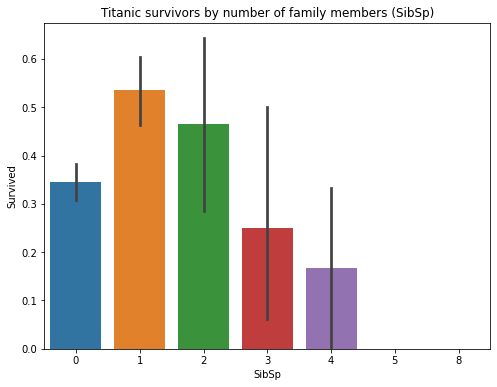

In [67]:
f, ax = plt.subplots(figsize=(8, 6))
ax =sns.barplot(x="SibSp", y="Survived", data=train)
plt.title("Titanic survivors by number of family members (SibSp)")


print(colored('         (percentages are rounded to the nearest whole number)    ', 'blue', attrs=['bold']))
print(" ")
survived_one=train["Survived"][train["SibSp"] ==1].value_counts(normalize = True)[1]*100
print(survived_one.round(decimals=0),"% of passengers with one parent and/or child aboard survived.")


survived_two=train["Survived"][train["SibSp"] ==2].value_counts(normalize = True) [1]*100
print(survived_two.round(decimals=0),"% of passengers with two parents and/or children aboard survived.")

survived_zero=train["Survived"][train["SibSp"] ==0].value_counts(normalize = True)[1]*100
print(survived_zero.round(decimals=0),"% of passengers with no parents and/or children aboard survived.")

survived_three=train["Survived"][train["SibSp"] ==3].value_counts(normalize = True)[1]*100
print(survived_three.round(decimals=0),"% of passengers with three parents and/or children aboard survived.")

survived_four=train["Survived"][train["SibSp"] ==4].value_counts(normalize = True)[1]*100
print(survived_four.round(decimals=0),"% of passengers with four parents and/or children survived.")

print("  ")



                 Titanic Survivors with and without family members


[Text(0, 0, 'With Family'), Text(1, 0, 'Alone')]

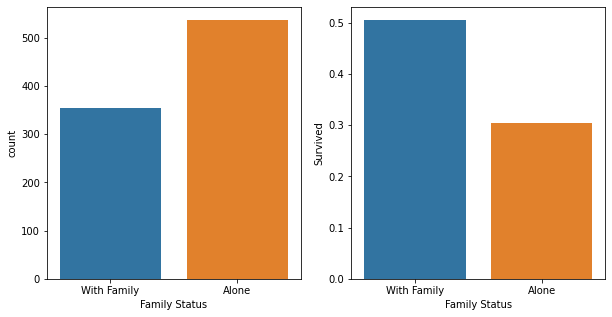

In [68]:

print(colored('                 Titanic Survivors with and without family members'   , 'blue', attrs=['bold']))
#print('               Titanic Survivors with and without family members')

train['Family Status'] =  train["Parch"] + train["SibSp"]
train['Family Status'].loc[train['Family Status'] > 0] = 1
train['Family Status'].loc[train['Family Status'] == 0] = 0

train['Family Status'] =  train["Parch"] + train["SibSp"]
train['Family Status'].loc[train['Family Status'] > 0] = 1
train['Family Status'].loc[train['Family Status'] == 0] = 0

# drop Parch & SibSp
train    = train.drop(['SibSp','Parch'], axis=1)

# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Family Status', data=train, order=[1,0], ax=axis1)


# average of survived for those who had/didn't have any family member
family_situation = train[["Family Status", "Survived"]].groupby(['Family Status'],as_index=False).mean()
sns.barplot(x='Family Status', y='Survived', data=family_situation, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

The charts show that passengers with one or two family members had the greatest survial rate.
Overall, the number of passengers who were alone were significantly higher than those with family members, and passengers who were alone had a much lower survival rate. 

Here is an interesting question, what are the most common last names from the Titanic passengers? 

In [69]:
print(train['Last_Name'].value_counts())

Andersson    9
Sage         7
Carter       6
Goodwin      6
Johnson      6
            ..
Sjostedt     1
Elsbury      1
Kraeff       1
Ball         1
Colley       1
Name: Last_Name, Length: 667, dtype: int64


In [70]:
train['most_common_name']=train['Last_Name']=='Andersson'

Observations: Andersson was the most common last name. Out of the 9 passengers named Andersson, 6 people had 4 SibSp (sibling/spouse(s), no doubt some of these passengers were related. All 9 passengers were in the 3rd class and only two survived.

In [71]:
print(train[train['most_common_name']==True])

     PassengerId  Survived  Pclass  \
13            14         0       3   
68            69         1       3   
119          120         0       3   
146          147         1       3   
541          542         0       3   
542          543         0       3   
610          611         0       3   
813          814         0       3   
850          851         0       3   

                                                  Name  Sex   Age   Ticket  \
13                         Andersson, Mr. Anders Johan    0  39.0   347082   
68                     Andersson, Miss. Erna Alexandra    1  17.0  3101281   
119                  Andersson, Miss. Ellis Anna Maria    1   2.0   347082   
146       Andersson, Mr. August Edvard ("Wennerstrom")    0  27.0   350043   
541               Andersson, Miss. Ingeborg Constanzia    1   9.0   347082   
542                  Andersson, Miss. Sigrid Elisabeth    1  11.0   347082   
610  Andersson, Mrs. Anders Johan (Alfrida Konstant...    1  39.0   34708

In [72]:
train['second_most_common_name']=train['Last_Name']=='Sage'

Observations: The second most popular last name for passengers was Sage, with a total of 7 passengers with that name. Each Sage passenger is listed as having 8 SibSp, so no doubt there was some family relations between passengers. All 7 passengers were in 3rd class and none survived. 4 were male and 3 were female.

What do you think contributed to their demise the most, being in 3rd class cause and sticking together as a family perhaps? 

In [73]:
print(train[train['second_most_common_name']==True])

     PassengerId  Survived  Pclass                               Name  Sex  \
159          160         0       3         Sage, Master. Thomas Henry    0   
180          181         0       3       Sage, Miss. Constance Gladys    1   
201          202         0       3                Sage, Mr. Frederick    0   
324          325         0       3           Sage, Mr. George John Jr    0   
792          793         0       3            Sage, Miss. Stella Anna    1   
846          847         0       3           Sage, Mr. Douglas Bullen    0   
863          864         0       3  Sage, Miss. Dorothy Edith "Dolly"    1   

      Age    Ticket   Fare Cabin Embarked Last_Name  \
159  30.0  CA. 2343  69.55   NaN        S      Sage   
180  30.0  CA. 2343  69.55   NaN        S      Sage   
201  30.0  CA. 2343  69.55   NaN        S      Sage   
324  30.0  CA. 2343  69.55   NaN        S      Sage   
792  30.0  CA. 2343  69.55   NaN        S      Sage   
846  30.0  CA. 2343  69.55   NaN        S    

In [74]:
print(" ")

Here is a question, could the last name be a predictor of survival? If there were a passenger with the last name Rockefeller, how would you predict survival for that passenger?

There are many more questions and ideas to explore from the Titanic data set. I hope that you found this project interesting! I hope to add more to this project in the future.